# Logistic Regression with the Iris Dataset

For more explanation of logistic regression, see
1. [Our course notes](https://jennselby.github.io/MachineLearningCourseNotes/#binomial-logistic-regression)
1. [This scikit-learn explanation](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
1. [The full scikit-learn documentation of the LogisticRegression model class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
0. Read through the code in the following sections
  * [Iris Dataset](#Iris-Dataset)
  * [Visualization](#Visualization)
  * [Model Training](#Model-Training)
  * [Prediction](#Prediction)
0. Complete at least one of the following exercises
  * [Exercise Option #1 - Standard Difficulty](#Exercise-Option-#1---Standard-Difficulty)
  * [Exercise Option #2 - Advanced Difficulty](#Exercise-Option-#2---Advanced-Difficulty)

In [32]:
from sklearn import linear_model # for fitting our model
from sklearn.datasets import load_iris # the iris dataset is included in scikit-learn

# force numpy not to use scientific notation, to make it easier to read the numbers the program prints out
import numpy
numpy.set_printoptions(suppress=True)

# to display graphs in this notebook
%matplotlib notebook
import matplotlib.pyplot

from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

import math

## Iris Dataset

Before you go on, make sure you understand this dataset. Modify the cell below to examine different parts of the dataset that are contained in the 'iris' dictionary object.

What are the features? What are we trying to classify?

In [33]:
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


You can also try looking at it using a [pandas dataframe](https://jennselby.github.io/MachineLearningCourseNotes/#pandas).

In [34]:
import pandas
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = [iris.target_names[target] for target in iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


For this tutorial, at least to start, we're not going to use the whole dataset, just because it is easier to visualize two features than four. The code below decides which two features we're going to use.

We'll also need to know at what location in the list each of the classes start at.

In [36]:
# Use just two columns (the first and fourth in this case).
x1_feature = 0
x2_feature = 3
iris_inputs = iris.data[:,[x1_feature,x2_feature]]

mins=[iris_df.min()[x1_feature],iris_df.min()[x2_feature]]
maxs=[iris_df.max()[x1_feature],iris_df.max()[x2_feature]]

# The data are in order by class. Find out where the other classes start in the list
start_class_one = list(iris.target).index(1)
start_class_two = list(iris.target).index(2)

## Visualization

Let's visualize our dataset, so that we can better understand what it looks like.

<IPython.core.display.Javascript object>


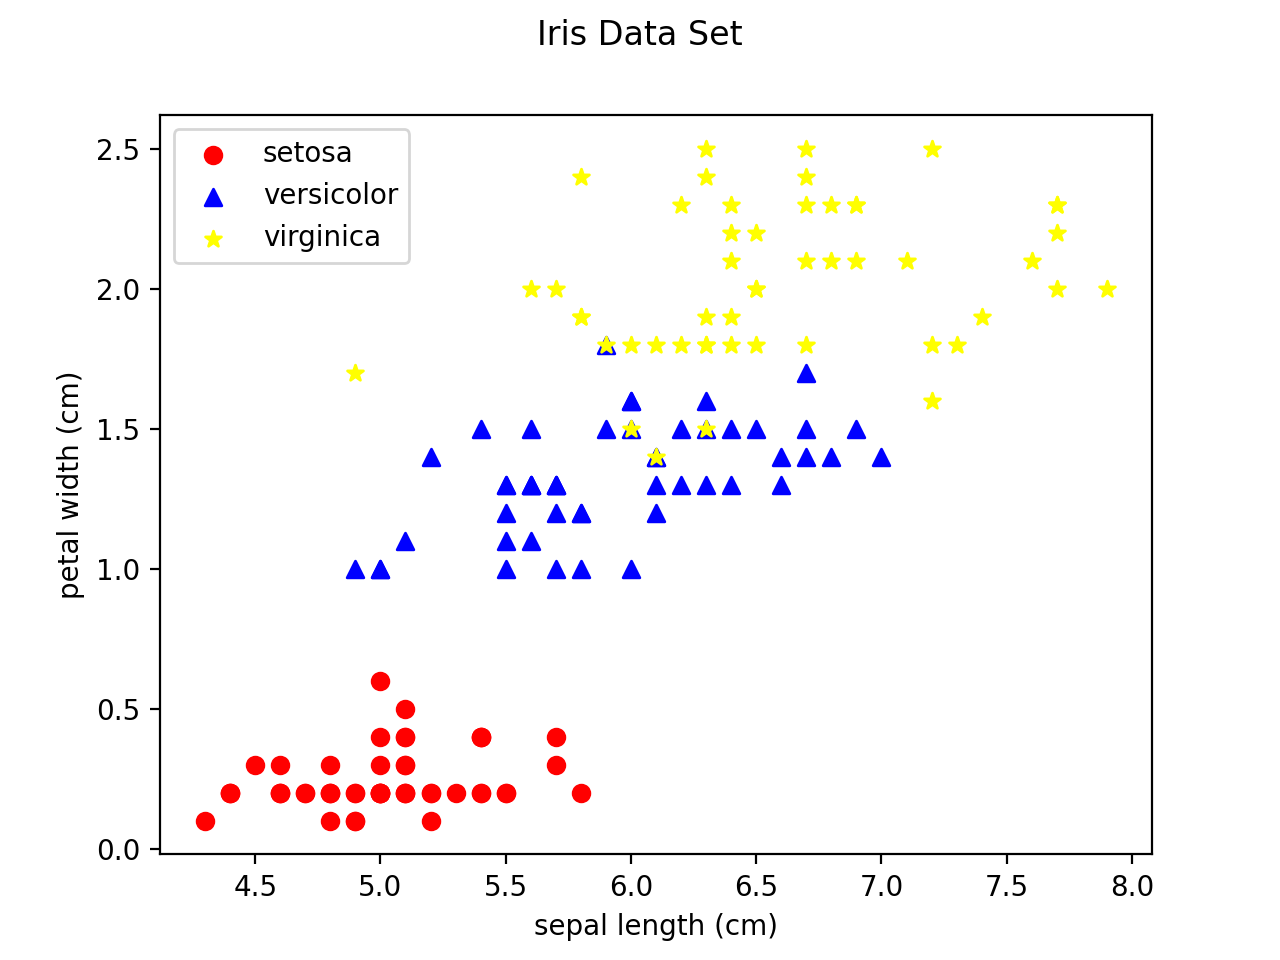

In [37]:
# split the two inputs into single dimensional arrays for plotting
x1 = iris_inputs[:,0]
x2 = iris_inputs[:,1]

# create a figure and label it

def plot_iris():
    fig = matplotlib.pyplot.figure()
    fig.suptitle('Iris Data Set')
    matplotlib.pyplot.xlabel(iris.feature_names[x1_feature])
    matplotlib.pyplot.ylabel(iris.feature_names[x2_feature])

    # put the input data on the graph, with different colors and shapes for each type
    scatter_0 = matplotlib.pyplot.scatter(x1[:start_class_one], x2[:start_class_one],
                                          c="red", marker="o", label=iris.target_names[0])
    scatter_1 = matplotlib.pyplot.scatter(x1[start_class_one:start_class_two], x2[start_class_one:start_class_two],
                                          c="blue", marker="^", label=iris.target_names[1])
    scatter_2 = matplotlib.pyplot.scatter(x1[start_class_two:], x2[start_class_two:],
                                          c="yellow", marker="*", label=iris.target_names[2])

    # add a legend to explain which points are which
    matplotlib.pyplot.legend()
    
plot_iris()

# show the graph
matplotlib.pyplot.show()

## Model Training

Next, we want to fit our logistic regression model to the subset of the data we're using.

In [38]:
model = linear_model.LogisticRegression()
model.fit(iris_inputs, iris.target)

print('Intercept: {0}  Coefficients: {1}'.format(model.intercept_, model.coef_))

Intercept: [ 10.71081419  -0.10484162 -10.60597257]  Coefficients: [[-1.19282061 -3.80674934]
 [ 0.27892882 -0.07151506]
 [ 0.9138918   3.8782644 ]]


## Prediction

Now we can make some predictions using the trained model. We'll pull out some examples from our training data and see what the model says about them.

In [39]:
# Use the first input from each class
inputs = [iris_inputs[0], iris_inputs[start_class_one], iris_inputs[start_class_two]]

print('Class predictions: {0}'.format(model.predict(inputs))) # guess which class
print('Probabilities:\n{0}'.format(model.predict_proba(inputs))) # give probability of each class

Class predictions: [0 1 2]
Probabilities:
[[0.92831857 0.07157087 0.00011056]
 [0.00559652 0.62519423 0.36920925]
 [0.00001365 0.03313084 0.96685551]]


Below is a little test thing I did to check I understood how the `model.predict_proba` function works.

In [40]:
ls=model.decision_function(inputs)
print(ls[0])
a=sum([math.exp(i) for i in ls[0]])
[math.exp(i)/a for i in ls[0]]

[ 3.86607919  1.30339232 -5.16947152]


[0.928318571574463, 0.07157086608521805, 0.00011056234031900295]

## Model Validation
Let's validate the model with an F-Measure function. Here, a value of 1 indicates perfect prediction, while a value of 0.5 would be random chance.

In [41]:
def F_measure(model,data, targets):
    predictions=model.predict(data)
    
    true_positives=[sum([prediction==target==i for prediction, target in zip(predictions,targets)]) for i in model.classes_]
    false_negatives=[sum([prediction!=target==i for prediction, target in zip(predictions,targets)]) for i in model.classes_]
    false_positives=[sum([prediction==i!=target for prediction, target in zip(predictions,targets)]) for i in model.classes_]
    
    precision=[a/(a+b) for a,b in zip(true_positives, false_positives)]
    recall=[a/(a+b) for a,b in zip(true_positives, false_negatives)]
    f_meas=[2*(P*R)/(P+R) for P,R in zip(precision, recall)]
    
    return(f_meas)

F_measure(model,iris_inputs,iris.target)

[1.0, 0.9411764705882353, 0.9387755102040817]

# Exercise Option #1 - Standard Difficulty

Answer the following questions. You can also use the graph below, if seeing the data visually helps you understand the data.
1. What should we be expecting as the output for class predictions in the above cell? If the model is not giving the expected output, what are some of the reasons it might not be?
1. How do the probabilities output by the above cell relate to the class predictions? Why do you think the model might be more or less confident in its predictions?
1. Looking at the intercept and coefficient output further above, if a coefficient is negative, what has the model learned about this feature? In other words, if you took a datapoint and you increased the value of a feature that has a negative coefficient, what would you expect to happen to the probabilities the model gives this datapoint?
1. Do these two features allow you to predict the iris type well? How do you know? Explain using both the text output in the cells above and the graph below.
1. Try a different pair of features. Do these allow you to predict the iris type well? How do you know?

### Responses

1. One would expect the output class predictions to be `[0 1 2]`, as the three selected test irises come from the first, second, and third categories respectively.
1. The model will assign the class with the highest probability as its prediction; in this case, the first iris had a 93% chance of belonging to class 0, the second a 63% chance of belonging to class 1, and the final a 97% chance of belonging to class 2. The model's confidence in its prediction is captured by how much higher the highest probability is compared to the others; if a data point could belong to two classes, then the model will likely return probabilities closer to 50% for those two classes.
1. If a coefficient has a negative value, then increasing its corresponding feature value will decrease the value of the `model.decision_function` output for that class. This, in turn, decreases the logistic function's (sigmoid curve's) value, which then decreases the final probability output for that class.
1. Using the F-measure fucntion above, we see that these features allow us to easily identify the 0 class of irises, and do reasonably well at separating the other two. This is apparent in the graph, as the 0 class of irises is separated from the rest, while the other two classes have some overlap with one another (though not too much so as to make the model overly inaccurate).
1. Using the same F-measure as above, most of the pairs of features seem to allow us to identify the irises reasonably well; class 0 is consistently identified perfectly, as it seems somewhat separate from the rest of the data no matter the pair of features chosen. The choice of features (0,1) however is pretty bad at distinguishing the other two groups.

# Exercise Option #2 - Advanced Difficulty

The plot above is only showing the data, and not anything about what the model learned. Come up with some ideas for how to show the model fit and implement one of them in code. Remember, we are here to help if you are not sure how to write the code for your ideas!

We want to look for inputs `[a,b]` in our data such that `model.decision_function([[a,b]])` has two equal values in its output. This indicates points where the model is assigning equal probability to two classes, as to go from `model.decision_function` to `model.predict_proba`, scikit just takes exponentials and normalizes.

<IPython.core.display.Javascript object>


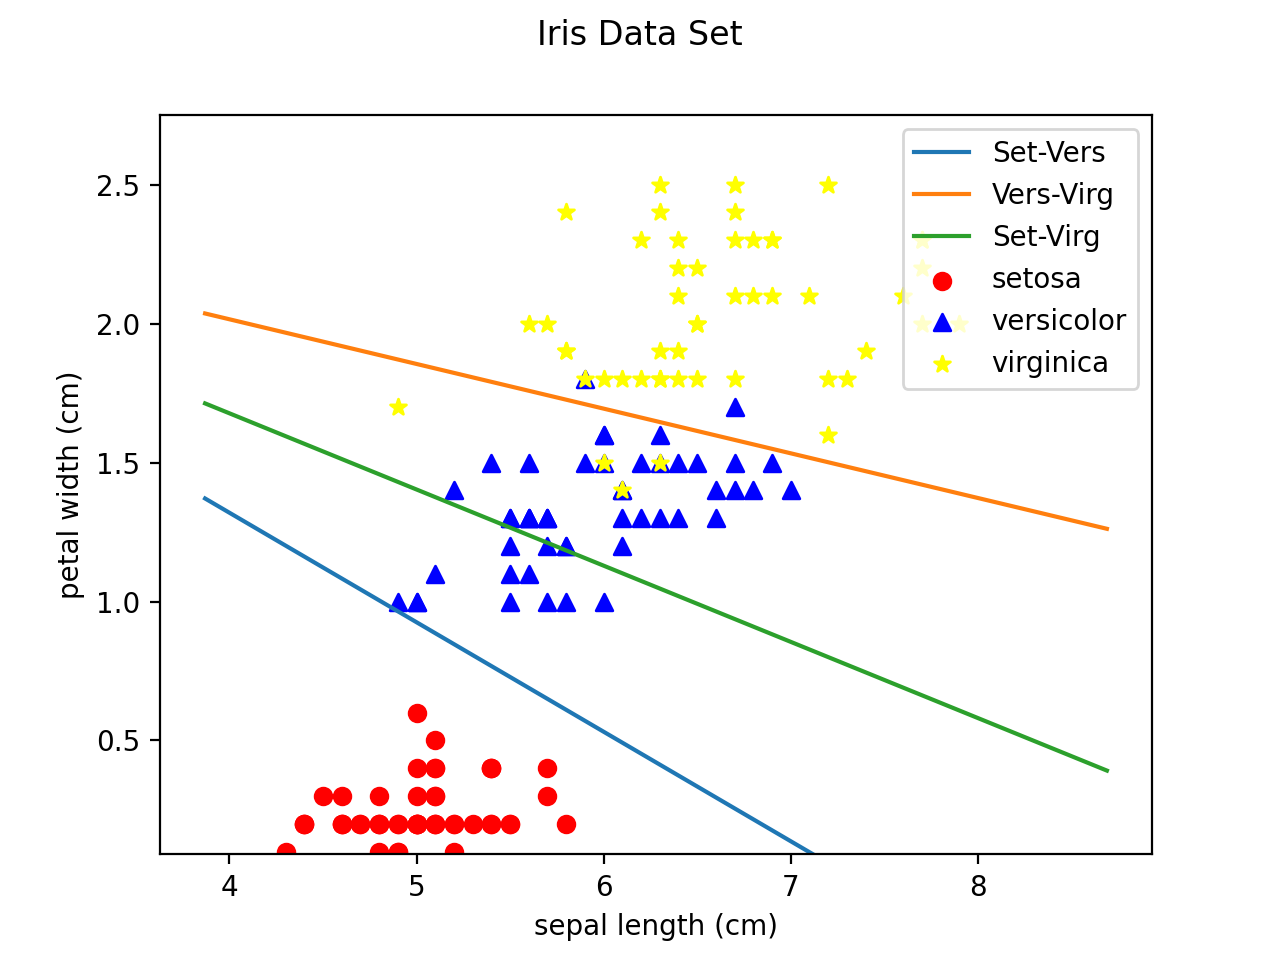

In [42]:
# Function that plots lines of equal probability between two classes g1 and g2
def division_line(x,g1, g2):
    # Get coefficients
    coef=model.coef_
    inter=model.intercept_
    
    # Solution to equation c11*x+c12*y+i1=c21*x+c22*y+i2
    y=((coef[g1,0]-coef[g2,0])*x+inter[g1]-inter[g2])/(coef[g2,1]-coef[g1,1])
    return(y)

plot_iris()

# Making division lines
X1=numpy.linspace(0.9*mins[0],1.1*maxs[0])
Y1=division_line(X1,0,1)
Y2=division_line(X1,1,2)
Y3=division_line(X1,0,2)

# Setting bounds because otherwise the plot looks bad
matplotlib.pyplot.ylim(0.9*mins[1], 1.1*maxs[1])

matplotlib.pyplot.plot(X1, Y1, label="Set-Vers")
matplotlib.pyplot.plot(X1, Y2, label="Vers-Virg")
matplotlib.pyplot.plot(X1, Y3, label="Set-Virg")

# Updating legend to include new labels
matplotlib.pyplot.legend()

matplotlib.pyplot.show()

# 3 Features Logistic Regression

I redid everything but now with support for 3 features. The most interesting thing that came out of this was the 3d plot, which is more fun to play around with.

In [43]:
# Add new column.
x3_feature=2

iris_inputs_3d = iris.data[:,[x1_feature,x2_feature,x3_feature]]

In [44]:
model_3d = linear_model.LogisticRegression()
model_3d.fit(iris_inputs_3d, iris.target)

# Calculate F measures, which should be strictly higher since there is more input data 
F_measure(model_3d,iris_inputs_3d,iris.target)

[1.0, 0.9494949494949495, 0.9504950495049505]

<IPython.core.display.Javascript object>


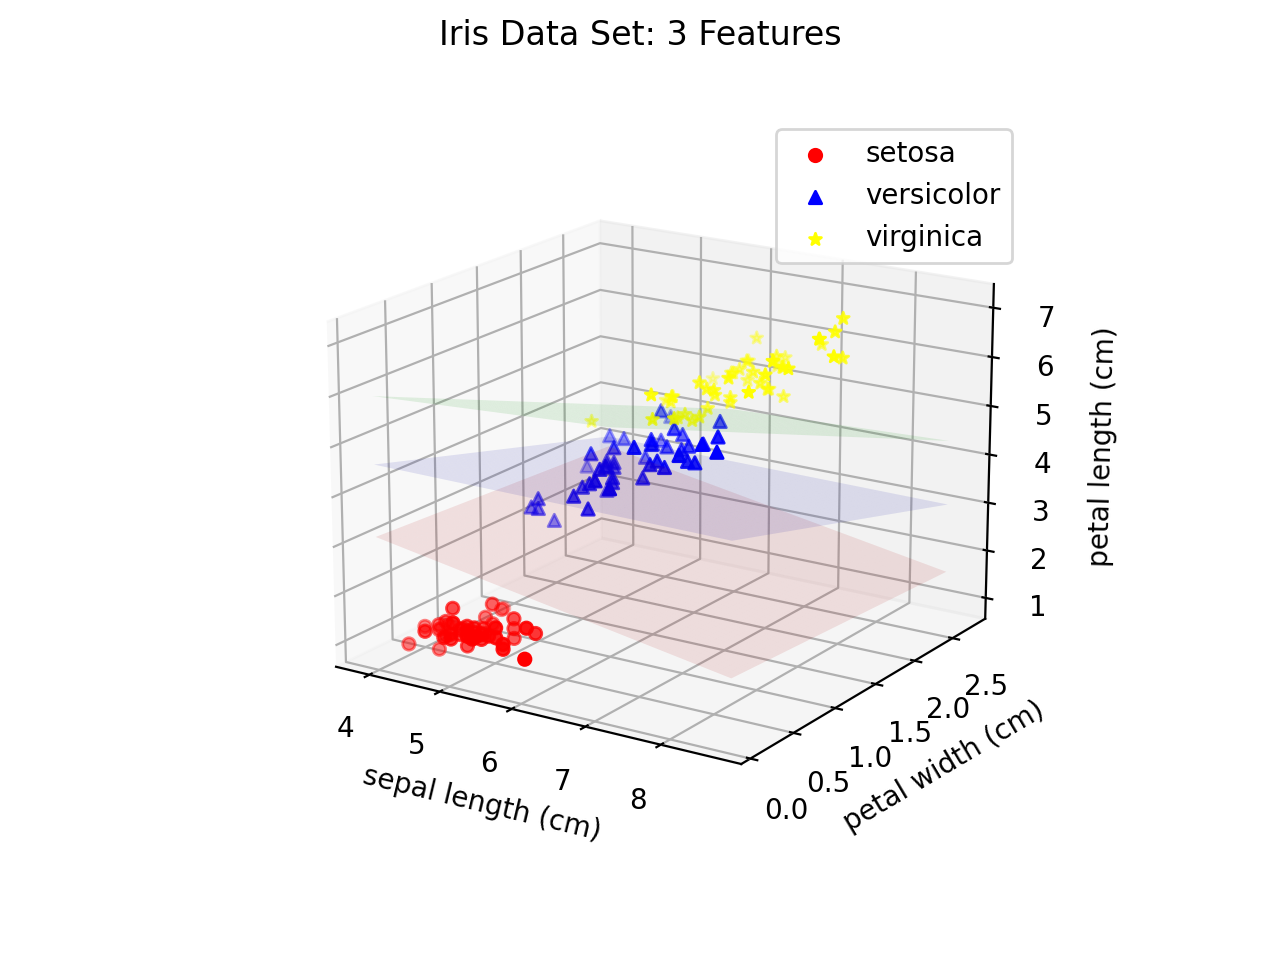

In [45]:
x1_3d = iris_inputs_3d[:,0]
x2_3d = iris_inputs_3d[:,1]
x3_3d = iris_inputs_3d[:,2]

# create a figure and label it

def division_line_3d(x,y,g1, g2):
    # Get coefficients
    coef=model_3d.coef_
    inter=model_3d.intercept_
    
    # Solution to equation c11*x+c12*y+c13*z+i1=c21*x+c22*y+c23*z+i2
    z=((coef[g1,0]-coef[g2,0])*x+(coef[g1,1]-coef[g2,1])*y+inter[g1]-inter[g2])/(coef[g2,2]-coef[g1,2])
    return(z)

def plot_iris_3d():
    fig = matplotlib.pyplot.figure()
    fig.suptitle('Iris Data Set: 3 Features')
   
    axes = fig.gca(projection='3d')
    axes.set_xlabel(iris.feature_names[x1_feature])
    axes.set_ylabel(iris.feature_names[x2_feature])
    axes.set_zlabel(iris.feature_names[x3_feature])
    
    X1_3d = numpy.linspace(0.9*mins[0],1.1*maxs[0])
    X2_3d = numpy.linspace(0.9*mins[1],1.1*maxs[1])
    X1_3d, X2_3d = numpy.meshgrid(X1_3d, X2_3d)

    # put the input data on the graph, with different colors and shapes for each type
    axes.scatter(x1_3d[:start_class_one], x2_3d[:start_class_one], x3_3d[:start_class_one],
                                          c="red", marker="o", label=iris.target_names[0])
    axes.scatter(x1_3d[start_class_one:start_class_two], x2_3d[start_class_one:start_class_two], 
                                          x3_3d[start_class_one:start_class_two], 
                                          c="blue", marker="^", label=iris.target_names[1])
    axes.scatter(x1_3d[start_class_two:], x2_3d[start_class_two:], x3_3d[start_class_two:],
                                          c="yellow", marker="*", label=iris.target_names[2])
    
    
    Z1= numpy.array(division_line_3d(X1_3d,X2_3d,0,1)).reshape(X1_3d.shape)
    Z2= numpy.array(division_line_3d(X1_3d,X2_3d,1,2)).reshape(X1_3d.shape)
    Z3= numpy.array(division_line_3d(X1_3d,X2_3d,0,2)).reshape(X1_3d.shape)
    
    axes.plot_surface(X1_3d, X2_3d, Z1, alpha=0.1, color=[1,0,0])
    axes.plot_surface(X1_3d, X2_3d, Z2, alpha=0.1, color=[0,1,0])
    axes.plot_surface(X1_3d, X2_3d, Z3, alpha=0.1, color=[0,0,1])


    # add a legend to explain which points are which
    matplotlib.pyplot.legend()
    
plot_iris_3d()